## Breast cancer data (feature 30개)

- 차원축소 (2, 5, 10) - 설명력
- PCA 전후 분류(Logistic Regression) 비교

### < 필요한 패키지 임포트 >

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### < 데이터 불러오기 >

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


### < PCA >

#### 1. 정규화

In [6]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

#### 2. PCA로 차원 축소

##### ▶ 2차원으로 축소

In [59]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
cancer_pca2 = pca2.fit_transform(cancer_std)
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_) # 63%

(array([0.44272026, 0.18971182]), 0.6324320765155945)

##### ▶ 5차원으로 축소

In [9]:
from sklearn.decomposition import PCA
pca5 = PCA(n_components=5)
cancer_pca5 = pca5.fit_transform(cancer_std)
pca5.explained_variance_ratio_, sum(pca5.explained_variance_ratio_) # 84%

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 0.8473427431680598)

##### ▶ 10차원으로 축소 

In [10]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)
cancer_pca10 = pca10.fit_transform(cancer_std)
pca10.explained_variance_ratio_, sum(pca10.explained_variance_ratio_) # 95%

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 0.9515688143331742)

### < PCA 전후 분류 비교 _ Logistic Regression >

### 1. 원본 데이터로 분류

(로지스틱 회귀를 사용하기 위해서는 정규화 과정이 필수이므로 원본 데이터는 위에서 정규화 한 cancer_std)

- 학습/테스트 데이터셋 분류

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, random_state=2021
)   # test_size default 값인 25%

- 로지스틱 회귀

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2021)
lr.fit(X_train, y_train)

LogisticRegression(random_state=2021)

- 예측 정확도 평가

In [50]:
lr.score(X_test, y_test)


0.993006993006993

### 2. 차원 축소한 데이터로 분류

##### ▶ 2차원으로 축소

- 학습/테스트 데이터셋 분류

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca2, cancer.target, stratify=cancer.target, random_state=2021
)   # test_size default 값인 25%

- 로지스틱 회귀

In [24]:
# 훈련
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(random_state=2021)
lr2.fit(X_train, y_train)

LogisticRegression(random_state=2021)

- 예측 정확도 평가

In [25]:
lr2.score(X_test, y_test)

0.9440559440559441

##### ▶ 5차원으로 축소

- 학습/테스트 데이터셋 분류

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5, cancer.target, stratify=cancer.target, random_state=2021
)   # test_size default 값인 25%

- 로지스틱 회귀

In [27]:
# 훈련
from sklearn.linear_model import LogisticRegression
lr5 = LogisticRegression(random_state=2021)
lr5.fit(X_train, y_train)

LogisticRegression(random_state=2021)

- 예측 정확도 평가

In [28]:
lr5.score(X_test, y_test)

0.993006993006993

##### ▶ 10차원으로 축소

- 학습/테스트 데이터셋 분류

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10, cancer.target, stratify=cancer.target, random_state=2021
)   # test_size default 값인 25%

- 로지스틱 회귀

In [30]:
# 훈련
from sklearn.linear_model import LogisticRegression
lr10 = LogisticRegression(random_state=2021)
lr10.fit(X_train, y_train)

LogisticRegression(random_state=2021)

- 예측 정확도 평가

In [31]:
lr10.score(X_test, y_test)

0.986013986013986

### +

### < Code Refactoring >

In [32]:
def pca_accuracy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=2021
    )
    lr = LogisticRegression(random_state=2021)
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    return round(score, 4)

In [47]:
for n in [30, 2, 5, 10]:        # 원본, 2차원, 5차원, 10차원
    pca = PCA(n_components=n)
    cancer_pca = pca.fit_transform(cancer_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(cancer_pca, cancer.target)
    print(f'PCA {n}: 설명력-{explained:.4f}, 정확도-{acc:.4f}')

PCA 30: 설명력-1.0000, 정확도-0.9930
PCA 2: 설명력-0.6324, 정확도-0.9441
PCA 5: 설명력-0.8473, 정확도-0.9930
PCA 10: 설명력-0.9516, 정확도-0.9860


### < 2차원으로 차원 축소한 데이터 시각화 >

In [54]:
df['PC1'] = cancer_pca2[:,0] # x축
df['PC2'] = cancer_pca2[:,1] # y축

In [ ]:
# np.unique(df.target, return_counts=True)
# target 에 0, 1 두 가지 값 존재

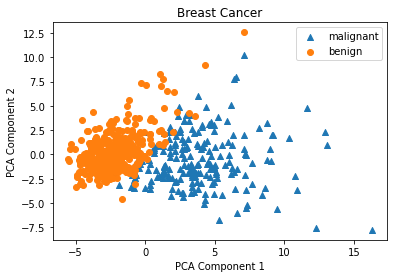

In [58]:
markers = ['^', 'o']

for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker,
                label=cancer.target_names[i])
                
plt.legend()
plt.title('Breast Cancer')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

- malignant tumor : 악성 종양
- benign tumor : 양성 종양